D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


   KIDSDRIV   AGE  HOMEKIDS   YOJ    INCOME  PARENT1  HOME_VAL  MSTATUS  \
0         0  60.0         0  11.0   67349.0        0       0.0        0   
1         0  43.0         0  11.0   91449.0        0  257252.0        0   
2         0  48.0         0  11.0   52881.0        0       0.0        0   
3         0  35.0         1  10.0   16039.0        0  124191.0        1   
6         0  34.0         1  12.0  125301.0        1       0.0        0   

   GENDER  TRAVTIME     ...      TIF  RED_CAR  OLDCLAIM  CLM_FREQ  REVOKED  \
0       1        14     ...       11        1    4461.0         2        0   
1       1        22     ...        1        1       0.0         0        0   
2       1        26     ...        1        1       0.0         0        0   
3       0         5     ...        4        0   38690.0         2        0   
6       0        46     ...        1        0       0.0         0        0   

   MVR_PTS  CLM_AMT  CAR_AGE  CLAIM_FLAG  URBANICITY  
0        3      0.0     1

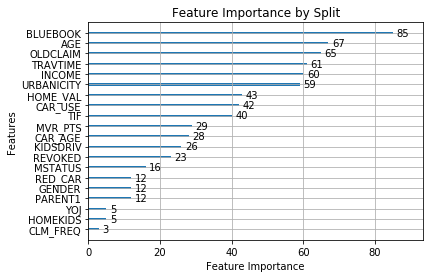

Plot 3th tree...


'\nfig,ax = plt.subplots(figsize=(15,15))\nplot_importance(clf,\n                height=0.5,\n                ax=ax,\n                max_num_features=64)\n#plt.show()\n'

In [1]:
#Feature Importance Figure

import pandas as pd
import numpy as np
import os
import xlrd
import xlsxwriter
import xlwt
from collections import Counter
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report
import operator
from sklearn.metrics import confusion_matrix
import time
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from xgboost import plot_importance,plot_tree
from matplotlib import pyplot
import graphviz

#import data
data=pd.read_csv(r'E:\Data_test\car_insurance_claim.csv')

#drop missing value rows
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 
data=data.replace(['Yes','No','z_F','z_No','M','Commercial','Private',
                  'yes','no','Highly Urban/ Urban','z_Highly Rural/ Rural'],[1,0,0,0,1,1,0,1,0,1,0])
data=data.drop({'BIRTH','EDUCATION','OCCUPATION','CAR_TYPE','ID'},axis=1)
print(data.head())

def get_data():
    train = data
    features = list(train.columns[:21])
    y_train = train['CLAIM_FLAG']
 #   x_train = train[features]
    x_train = train.drop({'CLAIM_FLAG','CLM_AMT'},axis=1)
    #x_train = train.drop({'CLAIM_FLAG'},axis=1)
    return x_train, y_train

x_train, y_train = get_data()

clf=xgb.XGBClassifier()
clf.fit(x_train,y_train) # fit the m

plot_importance(clf,
               importance_type='weight',title='Feature Importance by Split',xlabel='Feature Importance'
               )
pyplot.show()

# 3th D-tree
#print('Plot 3th tree...')  
#ax = plot_tree(clf)
#plt.show()


#graph=lgb.to_graphviz(clf)
#graph.render(view=True)

#graph=create_tree_digraph(clf)
#graph.render(view=True)


#graph = lgb.plot_tree(clf, tree_index=3, figsize=(20, 8), show_info=['split_gain'])
#plt.show()

'''
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(clf,
                height=0.5,
                ax=ax,
                max_num_features=64)
#plt.show()
'''

7657
CV method:StratifiedKFlod  Split number:  5
Start:   current:  1    Total:  5


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


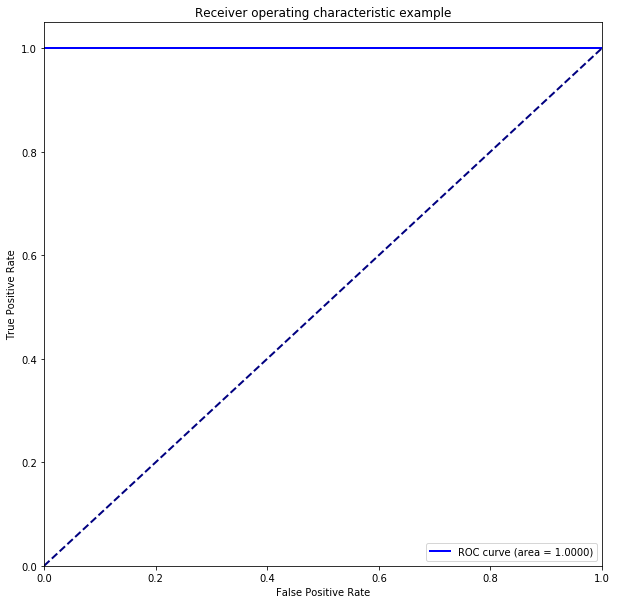

Start:   current:  2    Total:  5


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


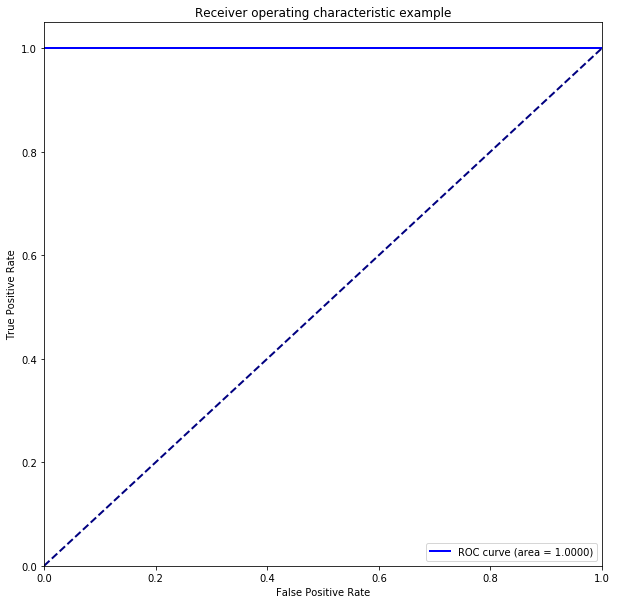

Start:   current:  3    Total:  5


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


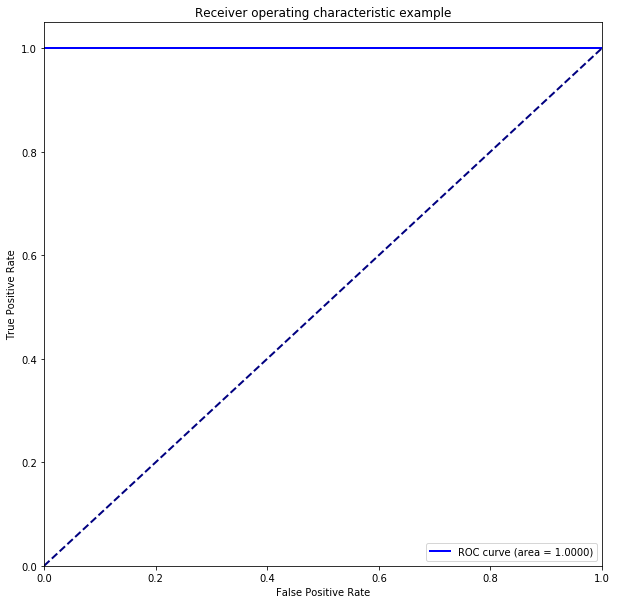

Start:   current:  4    Total:  5


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


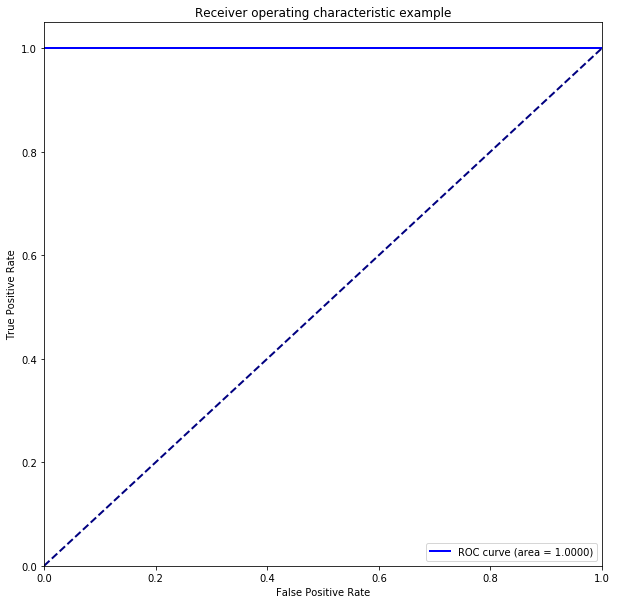

Start:   current:  5    Total:  5


D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


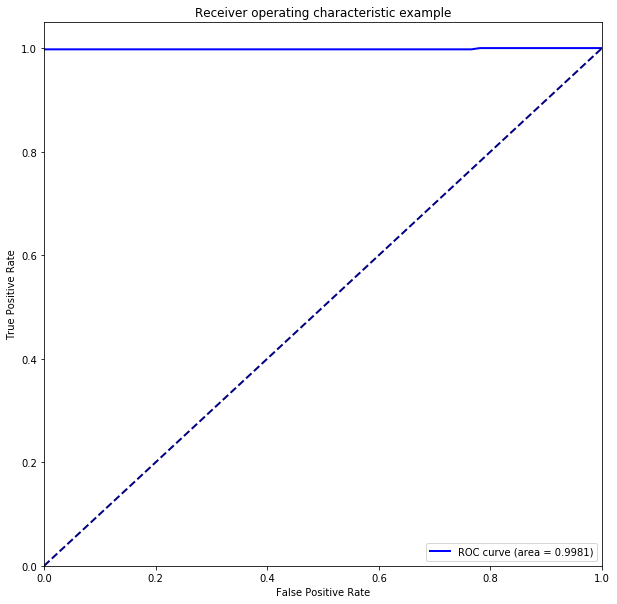

Mean Accuracy of Train Set:  1.0  Mean Accuracy of the Test Set: nan


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:190: RuntimeWarning: Mean of empty slice.
C:\Users\Chen\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
#Predicting_Model

def paintConfusion_digit(lmr_matrix,classes):
    plt.imshow(lmr_matrix,interpolation='nearest',cmap=plt.cm.Blues)
   # plt.imshow(lmr_matrix,interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    plt.xlabel('Predict label')
    plt.ylabel('True label')
    fmt='d'
    thresh=lmr_matrix.max()/2.
    for i,j in itertools.product(range(lmr_matrix.shape[0]),range(lmr_matrix.shape[1])):
        plt.text(j, i, format(lmr_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="black" if lmr_matrix[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()

#ROC AUC
def paintROC(y_test1,y_pred1):
    fpr,tpr,threshold = roc_curve(y_test1, y_pred1) ###real p value/ false p value
    roc_auc = auc(fpr,tpr) ###auc

    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='blue',
            lw=lw, label='ROC curve (area = %0.4f)' % roc_auc) ###
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
import pandas as pd
import numpy as np
import os
import xlrd
import xlsxwriter
import xlwt
from collections import Counter
import matplotlib.pyplot as plt
import itertools
import operator
from sklearn.metrics import classification_report

#import data
data=pd.read_csv(r'E:\Data_test\car_insurance_claim.csv')

#drop missing value rows
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 
x=data
kid=np.array(x['KIDSDRIV'])
age=np.array(x['AGE'])
homekid=np.array(x['HOMEKIDS'])
yoj=np.array(x['YOJ'])
income=np.array(x['INCOME'])
val=np.array(x['HOME_VAL'])
travtime=np.array(x['TRAVTIME'])
oldclaim=np.array(x['OLDCLAIM'])
fre=np.array(x['CLM_FREQ'])
mvr=np.array(x['MVR_PTS'])
amt=np.array(x['CLM_AMT'])
car_age=np.array(x['CAR_AGE'])
bluebook=np.array(x['BLUEBOOK'])

parent=np.array(pd.get_dummies(x['PARENT1']),dtype=np.float64)
mstatus=np.array(pd.get_dummies(x['MSTATUS']),dtype=np.float64)
edu=np.array(pd.get_dummies(x['EDUCATION']),dtype=np.float64)
sex=np.array(pd.get_dummies(x['GENDER']),dtype=np.float64)
occupation=np.array(pd.get_dummies(x['OCCUPATION']),dtype=np.float64)
car_use=np.array(pd.get_dummies(x['CAR_USE']),dtype=np.float64)
car_type=np.array(pd.get_dummies(x['CAR_TYPE']),dtype=np.float64)
tif=np.array(pd.get_dummies(x['TIF']),dtype=np.float64)
red=np.array(pd.get_dummies(x['RED_CAR']),dtype=np.float64)
revoked=np.array(pd.get_dummies(x['REVOKED']),dtype=np.float64)

x_initial=np.c_[kid,age,homekid,yoj,income,val,travtime,oldclaim,fre,mvr,amt,car_age,bluebook,parent,mstatus,
               edu,sex,occupation,car_use,car_type,tif,red,revoked]
y=np.array(x['CLAIM_FLAG'])

#Standardization
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_initial = Imputer().fit_transform(x_initial)
X=scaler.fit_transform(x_initial)


from sklearn.model_selection import StratifiedKFold  

cv_number=5# parameter

skf= StratifiedKFold(n_splits=cv_number) # x-fold cv 
skf.get_n_splits(X,y) 
print("CV method:StratifiedKFlod  Split number: ",cv_number)

from sklearn.metrics import confusion_matrix
import time
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from xgboost import plot_importance
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,auc

ac_test=[]
ac_train=[]
term=1

for train_index, test_index in skf.split(X, y):  
    print("Start:   current: ",term,"  ","Total: ",cv_number) 
    time_start=time.time()
    X_train,X_test = X[train_index], X[test_index]  
    y_train,y_test = y[train_index], y[test_index]
    
    #train model on different training base
    #clf=svm.SVC(C=2**(c_exp),kernel='rbf', gamma=2**(gamma_exp))# svm with radical basis function
#    clf=svm.SVC()#修改这行
    #clf=RandomForestClassifier(min_samples_leaf=msl,n_estimators=n_e,n_jobs=-1,random_state=3)
#    clf=RandomForestClassifier()#修改这行
  #  clf = GradientBoostingClassifier(n_estimators=10, random_state=10, subsample=0.6, max_depth=7,
                #                  min_samples_split=900)
 #   clf=GradientBoostingClassifier()
#    clf=xgb()
    xgb_params = {'booster':'gbtree','objective': 'binary:logistic', "eta": 0.01, "max_depth": 5,  "silent": 0,"colsample_bytree":0.7}
    num_rounds = 100
  #  clf = xgb.XGBClassifier()
    clf=lgb.LGBMClassifier()
 #   clf = LogisticRegression()
   # clf=MLPClassifier()
    
    clf.fit(X_train,y_train) # fit the model
  #  y_pred_test=clf.predict(X_test) #predict y based on X_test
    
    #output prob
    y_pred_test=clf.predict_proba(X_test)[:,1] 
    y_pred_train=clf.predict(X_train) #predict y based on X_train
#    ac_test.append(metrics.accuracy_score(y_test, y_pred_test))
    ac_train.append(metrics.accuracy_score(y_train,y_pred_train))
    time_end=time.time()
    term+=1
#    print("Time: ",round(time_end-time_start,2),
 #         " ac_train: ",round(metrics.accuracy_score(y_train,y_pred_train),4),
  #        " ac_test: ",round(metrics.accuracy_score(y_test, y_pred_test),4))
   
    #cm = confusion_matrix(y_test,y_pred_test)

  #Draw Confusion matrix  
  #  paintConfusion_digit(cm,[0,1])
 #   print(classification_report(y_test, y_pred_test))
    paintROC(y_test,y_pred_test)
    
ac_test=np.array(ac_test)
ac_train=np.array(ac_train)
print("Mean Accuracy of Train Set: ",round(ac_train.mean(),4),
     " Mean Accuracy of the Test Set:",round(ac_test.mean(),4))
#print("Parameters:")
#print("Regularization: 2**{}".format(c_exp),"  Gamma of RBF: 2**{} ".format(gamma_exp))


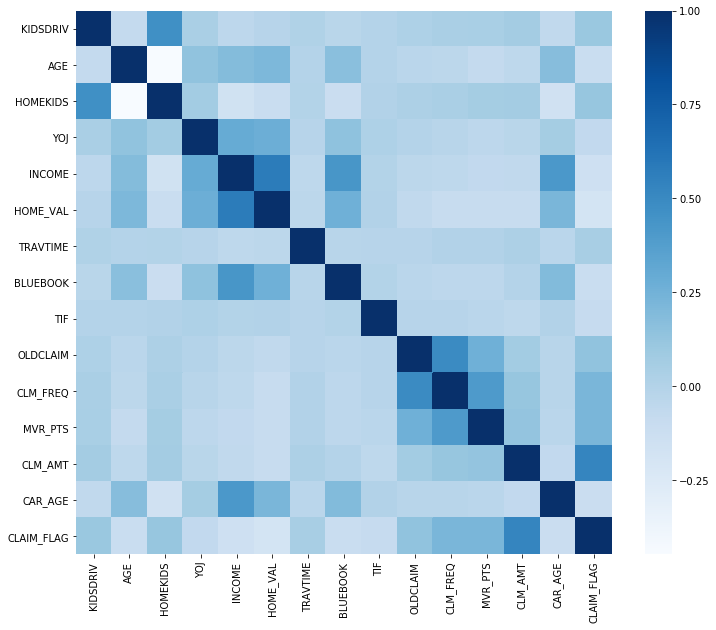

In [1]:
#Pearson Matrix

import pandas as pd
import os
import xlrd
import xlsxwriter
import numpy as np
import xlwt
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import data
data=pd.read_csv(r'E:\Data_test\car_insurance_claim.csv')
data=data.drop({'BIRTH','ID'},axis=1)

corr=data.corr()
fig=plt.gcf()
fig.set_size_inches(12,10)
fig=sns.heatmap(corr,cmap="Blues",mask=np.zeros_like(corr, dtype=np.bool),annot=False)
#Heatmap shows that there is no major corelation between dependent variables

In [27]:
from pyecharts import Boxplot
import pandas as pd
import numpy as np
import os
import xlrd
import xlsxwriter
import xlwt
from collections import Counter
import matplotlib.pyplot as plt
import itertools
import operator

#import data
data=pd.read_csv(r'E:\Data_test\car_insurance_claim.csv')

#drop missing value rows
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 
data=data.replace(['Yes','No','z_F','z_No','M','Commercial','Private',
                  'yes','no','Highly Urban/ Urban','z_Highly Rural/ Rural'],[1,0,0,0,1,1,0,1,0,1,0])
data=data.drop({'BIRTH','EDUCATION','OCCUPATION','CAR_TYPE','ID'},axis=1)


x=["AGE","HOMEKIDS","YOJ","INCOME","HOME_VAL","TRAVTIME","BLUEBOOK","TIF","OLDCLAIM","CLM_FRE","MVP_PTS","CLM_AMT"]
y1=['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
y2=['AGE','HOMEKIDS','YOJ','TRAVTIME','TIF','CLM_FREQ','MVR_PTS',]

y=[]
for i in y2:
    if i=="AGE":
        y=np.array(data[i])
    else:
        y=np.row_stack((y,np.array(data[i])))

print(y)

y_pred=Boxplot.prepare_data(y)
boxplot=Boxplot("  ","box")
boxplot.add('',y2,y_pred)

[[60. 43. 48. ... 48. 50. 52.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [11. 11. 11. ... 15.  7. 11.]
 ...
 [11.  1.  1. ...  7.  6.  6.]
 [ 2.  0.  0. ...  0.  0.  0.]
 [ 3.  0.  2. ...  0.  0.  0.]]


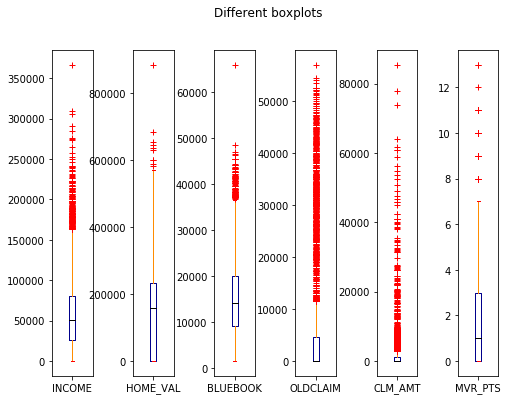

In [5]:
#Boxplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn 
#import data
data=pd.read_csv(r'E:\Data_test\car_insurance_claim.csv')

#drop missing value rows
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 

data=data.replace(['Yes','No','z_F','z_No','M','Commercial','Private',
                  'yes','no','Highly Urban/ Urban','z_Highly Rural/ Rural'],[1,0,0,0,1,1,0,1,0,1,0])
data=data.drop({'BIRTH','EDUCATION','OCCUPATION','CAR_TYPE','ID'},axis=1)

x=["AGE","HOMEKIDS","YOJ","INCOME","HOME_VAL","TRAVTIME","BLUEBOOK","TIF","OLDCLAIM","CLM_FRE","MVP_PTS","CLM_AMT"]
y1=['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT','MVR_PTS']
y2=['AGE','HOMEKIDS','YOJ','TRAVTIME','TIF','CLM_FREQ']

fig,axes = plt.subplots(1,6,figsize=(8,6))
color = dict(boxes='DarkBlue', whiskers='DarkOrange',
              medians='Black', caps='Red')

data[y1].plot(kind='box',ax=axes,subplots=True,
                              title='Different boxplots',color=color,sym='r+')
# sym--Means of outlier tagging

# Adjust the spacing between subgraphs
fig.subplots_adjust(wspace=1,hspace=1)  
plt.show()


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


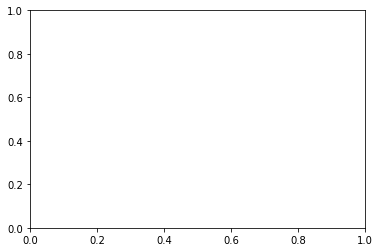

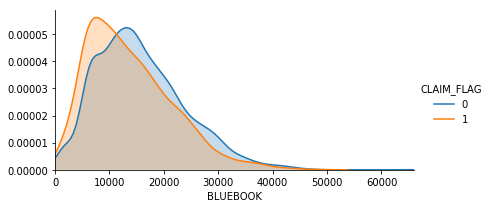

In [52]:
#Scatter plot distribution

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#import data
data=pd.read_csv(r'E:\Data_test\car_insurance_claim.csv')

#drop missing value rows
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 

data=data.replace(['Yes','No','z_F','z_No','M','Commercial','Private',
                  'yes','no','Highly Urban/ Urban','z_Highly Rural/ Rural'],[1,0,0,0,1,1,0,1,0,1,0])
data=data.drop({'BIRTH','ID'},axis=1)

y1=['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT','MVR_PTS']

a=plt.gca()
a = sns.FacetGrid(data, hue = 'CLAIM_FLAG', aspect=2 )
a.map(sns.kdeplot, 'BLUEBOOK', shade= True )
a.set(xlim=(0 , data['BLUEBOOK'].max()))
a.add_legend()

plt.show()


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


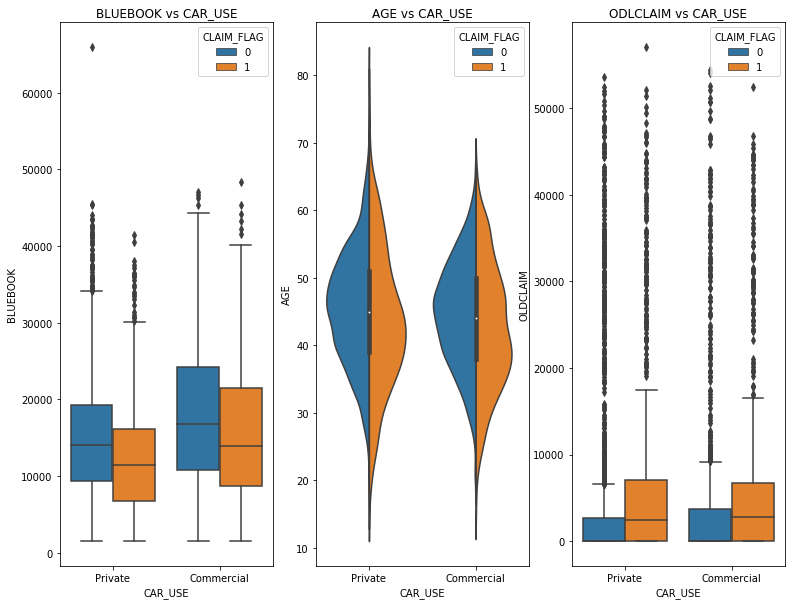

In [1]:
#Violin Plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#import data
data=pd.read_csv(r'E:\Data_test\car_insurance_claim.csv')

#drop missing value rows
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True) 

#data=data.replace(['Yes','No','z_F','z_No','M','Commercial','Private',
 #                 'yes','no','Highly Urban/ Urban','z_Highly Rural/ Rural'],[1,0,0,0,1,1,0,1,0,1,0])
data=data.drop({'BIRTH','ID'},axis=1)

y1=['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT','MVR_PTS']

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(13,10))

sns.boxplot(x = 'CAR_USE', y = 'BLUEBOOK', hue = 'CLAIM_FLAG', data = data, ax = axis1)
axis1.set_title('BLUEBOOK vs CAR_USE')

sns.violinplot(x = 'CAR_USE', y = 'AGE', hue = 'CLAIM_FLAG', data = data, split = True, ax = axis2)
axis2.set_title('AGE vs CAR_USE')

sns.boxplot(x = 'CAR_USE', y ='OLDCLAIM', hue = 'CLAIM_FLAG', data = data, ax = axis3)
axis3.set_title('ODLCLAIM vs CAR_USE')

plt.show()